<a href="https://colab.research.google.com/github/FlashEb/AI-and-ML-Final-Project-on-Computer-Vision/blob/main/AI_and_ML_Final_Project_on_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Final Project
## AI scanning images and classfying what it is
![image from visionplatform.ai](https://www.visionplatform.ai/wp-content/uploads/2024/01/object-detection.png)

### Created by Elijah Babayemi and Logan Anglin
## Group Name: The Visioneers

## What Is Object Detection?

Object detection is a branch of computer vision where AI identifies **what objects** are in an image and **where** they are. Unlike image classification (which just tells you “this is a dog”), object detection will draw a box around the dog and tell you its position and confidence level. In our demo, YOLOv5 labels the object, draws a box around it, and shows a confidence score (e.g., 0.87 = 87% sure it’s a dog).

---

## Real-World Applications

![image from DigitalOcean](https://fossbytes.com/wp-content/uploads/2020/04/Self-Driving-Cars-LED_-Tesla-Autopilot.jpg)

Object detection is used in:
- **Self-driving cars** (to detect pedestrians, cars, traffic lights)
- **Security systems** (for surveillance and threat detection)
- **Retail and inventory** tracking
- **Healthcare** (to spot tumors in scans)
- **Wildlife monitoring** (tracking animals in the wild)

---

## Ethical Considerations
![image from Electronic Frontier Foundation](https://www.eff.org/files/banner_library/nationalsecurity_banner-2_0.png)
While computer vision brings great benefits, it's important to consider:
- **Bias** in training data: A model trained mostly on Western data may misidentify people or objects in other regions.
- **Privacy** concerns: Real-time surveillance can be misused without consent.
- **Job displacement**: Automation using vision systems can impact human employment in security or inspection roles.

Responsible AI means using these tools **transparently, fairly, and securely**.

---

## What is YOLO

We’ll be using a pretrained model called **YOLOv5 (You Only Look Once)**, known for its **speed and accuracy** in real-time detection.

Yolo (You Only Look Once) is a very popular open-source Object Detection model. We chose this model because it tends to yield very accurate results despite being relatively fast and lightweight compared to other models. The version we are using is [YOLOv5 developed by Ultralytics](https://docs.ultralytics.com/yolov5).

# Demo


---

## Installing Dependencies
We begin by cloning the official YOLOv5 GitHub repository. YOLOv5 is developed and maintained by Ultralytics. YOLOv5 (You Only Look Once, version 5) is a fast and accurate deep learning model designed for real-time object detection, capable of identifying and locating multiple objects in a single image with high efficiency. After cloning, we change into the repository directory and install required Python packages using the requirements.txt file. This ensures our Colab environment is fully set up to use YOLOv5.

In [ ]:
# 🚀 STEP 1: Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17496/17496), 16.59 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:0

## Library imports

This project uses several libraries to function correctly.

The first of these libraries is [PyTorch](https://pytorch.org/). PyTorch is an open-source Machine Learning library used frequently in computer vision applications, YOLO included!

Next is [Pillow](https://pypi.org/project/pillow/). Pillow is an Image processing library. This library isn't explicitly used in our code, but is used internally by YOLO.

We then move on to an import unique to Google Colab. The files import provides helper functions that allow for the file upload in step 4 to occur.

Next, we have [IPython](https://ipython.org/). This library is used for creating an interactive shell and is used frequently by Data Scientists to test models interactively and display data in real time. IPython also integrates well with tools such as Jupyter and, of course, Google Colab. IPython is used in the very last line of code in our project to display an image after it has been uploaded and processed by YOLO.

Finally, we have the [os](https://docs.python.org/3/library/os.html) library. This library is a Python Standard Library and allows Python to interact with the Operating System. We are using it in step 5 to ensure a correct file path is used by the last line of code.

In [ ]:
# 🔄 STEP 2: Import necessary libraries
import torch
from PIL import Image
from google.colab import files
from IPython.display import Image as IPyImage, display
import os

## Load the Model

In this block of code, the specific model is chose. For this presentation, we will be using YOLOv5, a relatively lightweight version of YOLO. This version is also easier to train compared to the other YOLO models.

In [ ]:
# 📦 STEP 3: Load YOLOv5 model (small version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', trust_repo=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-6-23 Python-3.11.13 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 439MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Upload an image
At the bottom of the code, there will be a button that can be used to upload any image type. We recommend using Google Images to find an image that piques your interest.

In [ ]:
# 📸 STEP 4: Upload an image
print("⬆️ Please upload an image to detect objects:")
uploaded = files.upload()

⬆️ Please upload an image to detect objects:


Saving Gemini_Generated_Image_i17jhpi17jhpi17j.png to Gemini_Generated_Image_i17jhpi17jhpi17j.png


## Run the Model

Finally, the images are passed to the model to be processed. This is completed in a for loop, which is used in case multiple images are selected.

For each iteration of the for loop, an image is passed to the model. The model then analyses the images, placeing rectangles around what it determines are objects. The model then determines labels for each object and places them above the rectangles. Finally, the last three lines display the results! After uploading a photo, you should see the processed image below the code.

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 2048x2048 11 persons, 1 cat, 2 teddy bears
Speed: 362.6ms pre-process, 481.2ms inference, 34.7ms NMS per image at shape (1, 3, 640, 640)


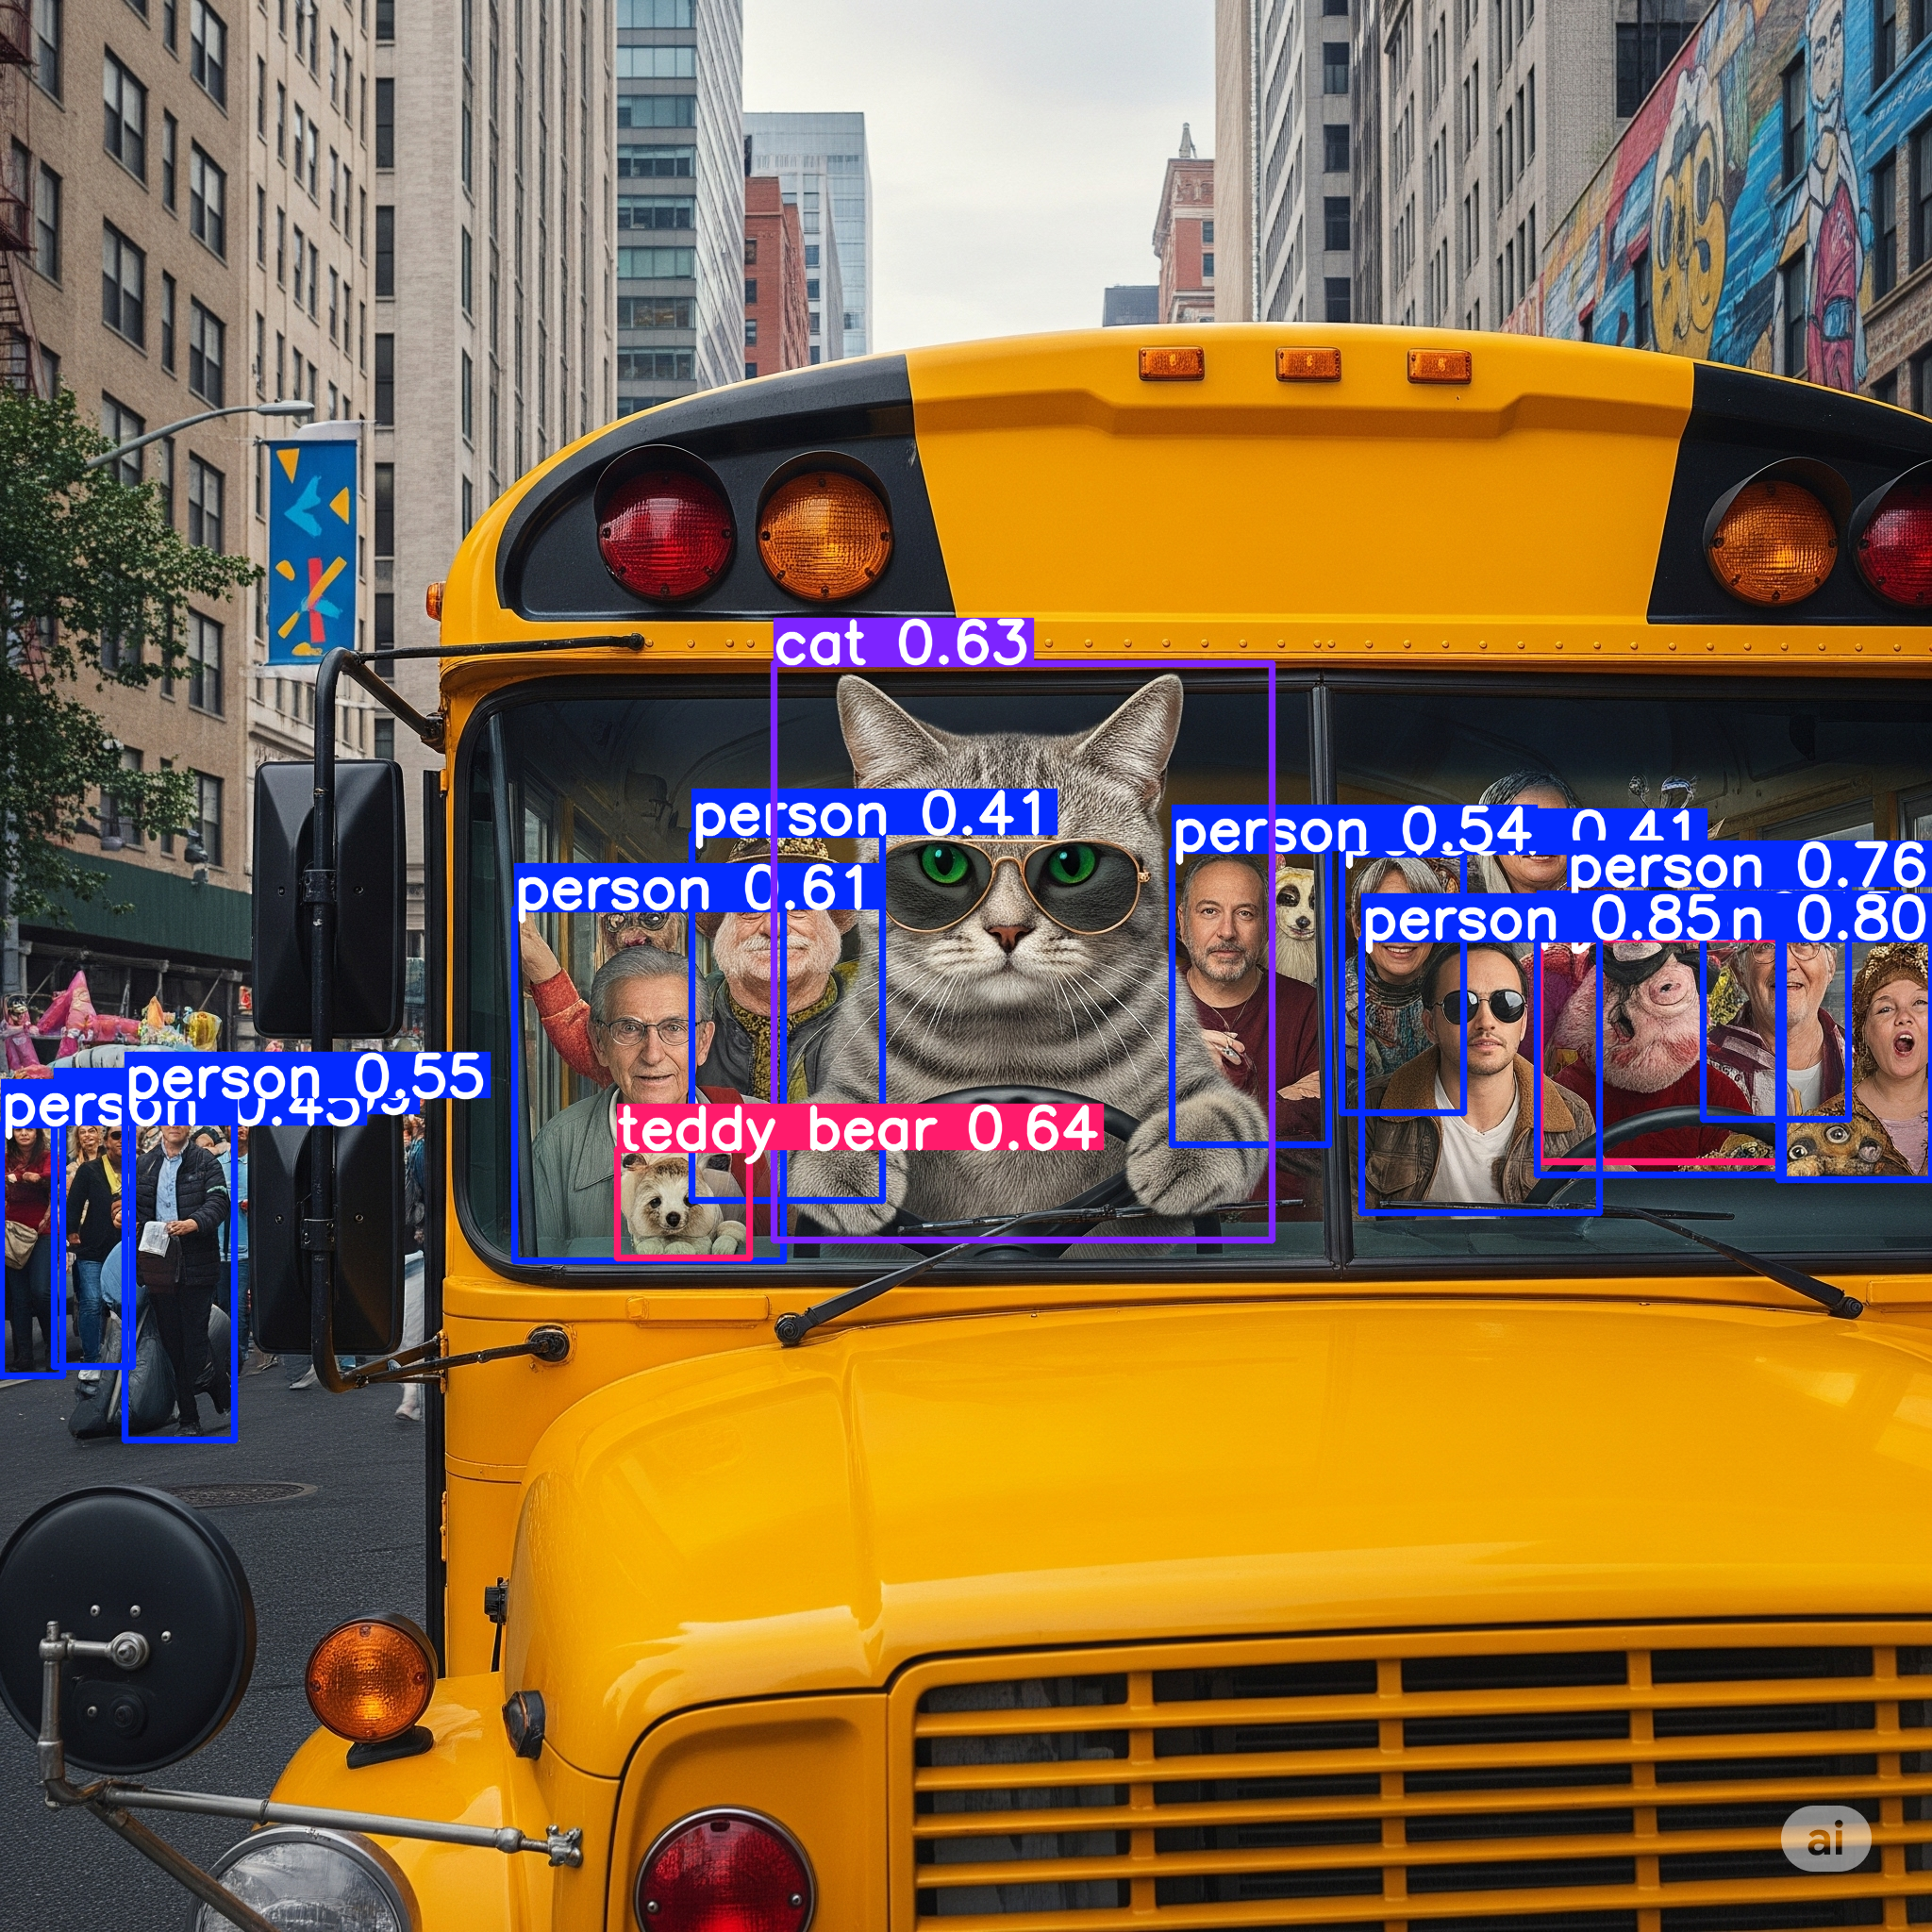

Saved 1 image to runs/detect/exp


🖼️ Detected Image:


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp/Gemini_Generated_Image_i17jhpi17jhpi17j.png'

In [ ]:
# 🔍 STEP 5: Run detection and display results
for img_name in uploaded.keys():

    # Run inference
      results = model(img_name)

    # Print results in text
      results.print()

    # Show results in notebook
      results.show()

    # Save the results to disk
      results.save()  # saves to runs/detect/exp

    # Display saved image
      result_path = 'runs/detect/exp/' + os.path.basename(img_name)
      print("🖼️ Detected Image:")
      display(IPyImage(filename=result_path))

---

# References

* Ultralytics. YOLOv5 Docs. Ultralytics. https://docs.ultralytics.com/yolov5/
* PyTorch. PyTorch. https://pytorch.org/
* Python Software Foundation. Pillow. PyPI. https://pypi.org/project/pillow/
* IPython Development Team. IPython: Productive Interactive Computing. https://ipython.org/
* Python Software Foundation. os — Miscellaneous operating system interfaces. Python 3 Documentation. https://docs.python.org/3/library/os.html
* https://chatgpt.com/s/t_6857f6c0e024819185dfe3790354b940